In [27]:
import os
import pickle

In [3]:
root_dir = "python"
_, current_folder = os.path.split(os.getcwd())
if current_folder != root_dir:
    os.chdir("../")

In [40]:
path = os.environ.get("PATH")
additional_path = 'C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\mingw-w64\\bin;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\usr\\bin;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\bin;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Scripts;C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\bin;C:\\Users\\Michi\\Anaconda3\\condabin'
min_additional_path = "C:\\Users\\Michi\\Anaconda3\\envs\\python_v3-8\\Library\\bin;C:\\Users\\micha\\anaconda3\\envs\\ai38\\Library\\bin;"
combined_path = min_additional_path + path
os.environ["PATH"] = combined_path

In [41]:
import librosa
import sounddevice

In [4]:
import torch
import numpy as np
from utils.augmentations_and_transforms import AddGaussianNoise, CyclicTemporalShift
import matplotlib.pyplot as plt

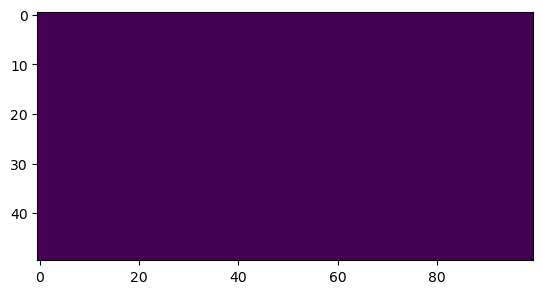

In [5]:
silence = torch.zeros(50, 100)
plt.imshow(silence)

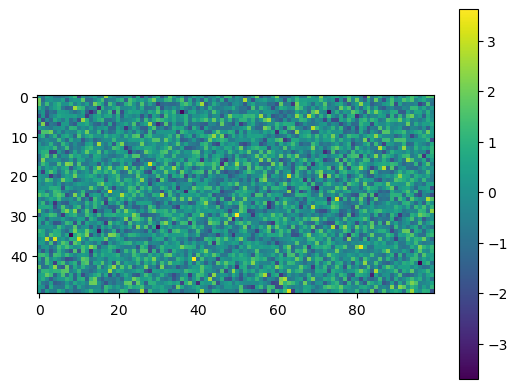

In [6]:
noiseTransform = AddGaussianNoise(0., 1.)
noise = noiseTransform(silence)
plt.imshow(noise)
plt.colorbar()

(5000,)

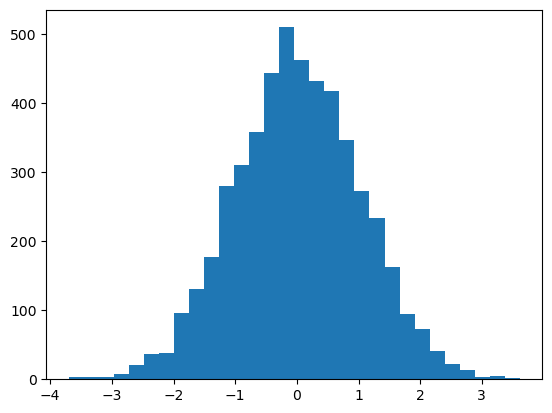

In [8]:
all_samples = np.array(torch.flatten(noise))
plt.hist(all_samples, 30)
all_samples.shape

# try out cyclic shift transform

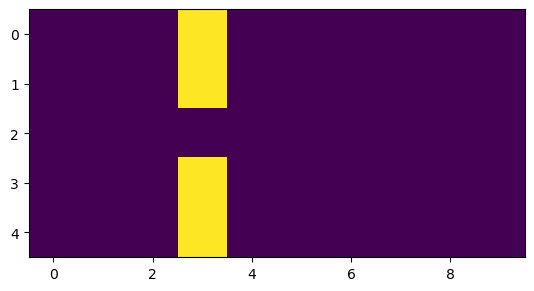

In [19]:
silence = torch.zeros(5,10)
click = silence
click[:, 3] = 1
click[2, 3] = 0
plt.imshow(click)

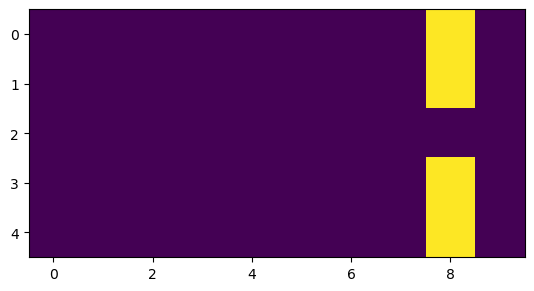

In [26]:
shifter = CyclicTemporalShift()
shifted_click = shifter(click)
plt.imshow(shifted_click)

# test with MFCC data

In [116]:
with open("data/Coswara_processed/pickles/participant_objects.pickle", "rb") as f:
            participants = pickle.load(f)
mfccs = participants[0].heavy_cough.MFCCs

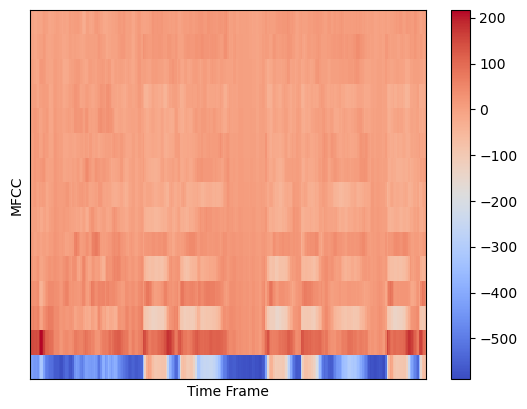

In [117]:
librosa.display.specshow(mfccs)
plt.xlabel("Time Frame")
plt.ylabel("MFCC")
plt.colorbar()

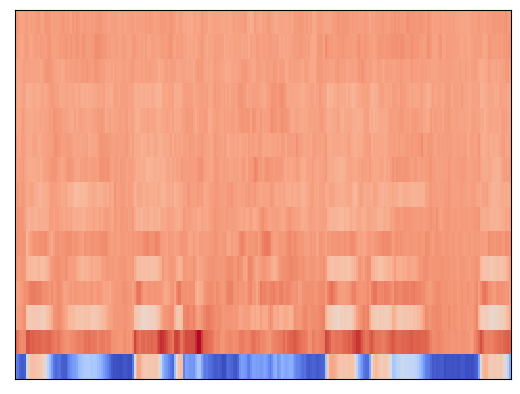

In [118]:
heavy_noise_generator = AddGaussianNoise(0., 5.)
noisy_mfccs = heavy_noise_generator(torch.tensor(mfccs))
shifted_noisy_mfccs = shifter(noisy_mfccs)
librosa.display.specshow(np.array(shifted_noisy_mfccs))